<a href="https://colab.research.google.com/github/jiinpark21/ESAA_24-1/blob/main/%EB%AF%B8%EB%8B%88_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 미니 프로젝트 (2)

- 관련 사이트 : https://dacon.io/competitions/open/235610/overview/description
- 과제 : 데이콘의 '와인 품질 분류 예측 경진대회' 데이터셋을 전처리 및 시각화하고, 분류 알고리즘 적용하기

- 조건 : 분류 모델 3가지 이상 적용

- 분석 파일을 1) 제출 후 리더보드에서 점수 확인 2) github에 업로드하여 점수와 깃허브 링크를 과제함에 댓글로 달아주시면 됩니다.

- 점수 고득점팀 1위 조원분들께는 우수학회원 점수 가산이 있을 예정입니다.

📍4/8(월), 5/3(금) 세션 이후 조별로 모여 프로젝트를 진행합니다.

📍중간 보고: 4/29 (월)

- 프로젝트 회의 후 당일 자정까지 프로젝트 회의 보고서 제출

📍5/10 (금)까지 최종 결과물(조당 하나의 깃허브 링크) 제출

📍5/13(월): 프로젝트 최종 발표

# **1. 라이브러리 및 데이터 불러오기**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [55]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/wine/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/wine/test.csv")
sub = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/wine/sample_submission.csv")

# **2. 탐색적 자료분석**

## 1) 데이터 미리보기

[데이터 변수]

- index : 구분자
- quality : 품질
- fixed acidity : 산도
- volatile acidity : 휘발성산
- citric acid : 시트르산
- residual sugar : 잔당 (발효 후 와인 속에 남아있는 당분)
- chlorides : 염화물
- free sulfur dioxide : 독립 이산화황
- total sulfur dioxide : 총 이산화황
- density : 밀도
- pH : 수소이온농도
- sulphates : 황산염
- alcohol : 도수
- type : 종류

In [6]:
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [8]:
test.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white


## 2) 데이터 요약

In [10]:
print(train.shape)
print(test.shape)

(5497, 14)
(1000, 13)


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


In [64]:
# index 피처 드랍
X = train.drop(['index', 'quality'], axis=1)
y = train.iloc[:, 1]
test_x = test.drop('index', axis=1)

## 3) 데이터 요약 통계량

In [17]:
pd.options.display.float_format = '{:.1f}'.format

In [43]:
X.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5497.0,5497.0,5497.0,5497.0,5497.0,5497.0,5497.0,5497.0,5497.0,5497.0,5497.0
mean,7.2,0.3,0.3,5.4,0.1,30.4,115.6,1.0,3.2,0.5,10.5
std,1.3,0.2,0.1,4.8,0.0,17.7,56.3,0.0,0.2,0.1,1.2
min,3.8,0.1,0.0,0.6,0.0,1.0,6.0,1.0,2.7,0.2,8.0
25%,6.4,0.2,0.2,1.8,0.0,17.0,78.0,1.0,3.1,0.4,9.5
50%,7.0,0.3,0.3,3.0,0.0,29.0,118.0,1.0,3.2,0.5,10.3
75%,7.7,0.4,0.4,8.1,0.1,41.0,155.0,1.0,3.3,0.6,11.3
max,15.9,1.6,1.7,65.8,0.6,289.0,440.0,1.0,4.0,2.0,14.9


## 4) 결측치 확인 및 데이터 전처리

In [45]:
X.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64

In [46]:
y.isna().sum()

0

- 결측값 존재하지 않음

In [63]:
# type 피처가 object형이므로 원핫 인코딩
# white 1, red 0

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train['type'])
train['type'] = le.transform(train['type'])
test['type'] = le.transform(test['type'])
# X = pd.get_dummies(X, columns=['type'], prefix=['type'])


# **3. 데이터 시각화**

- quality(품질)에 영향을 주는 변수를 찾아 분류해야 함

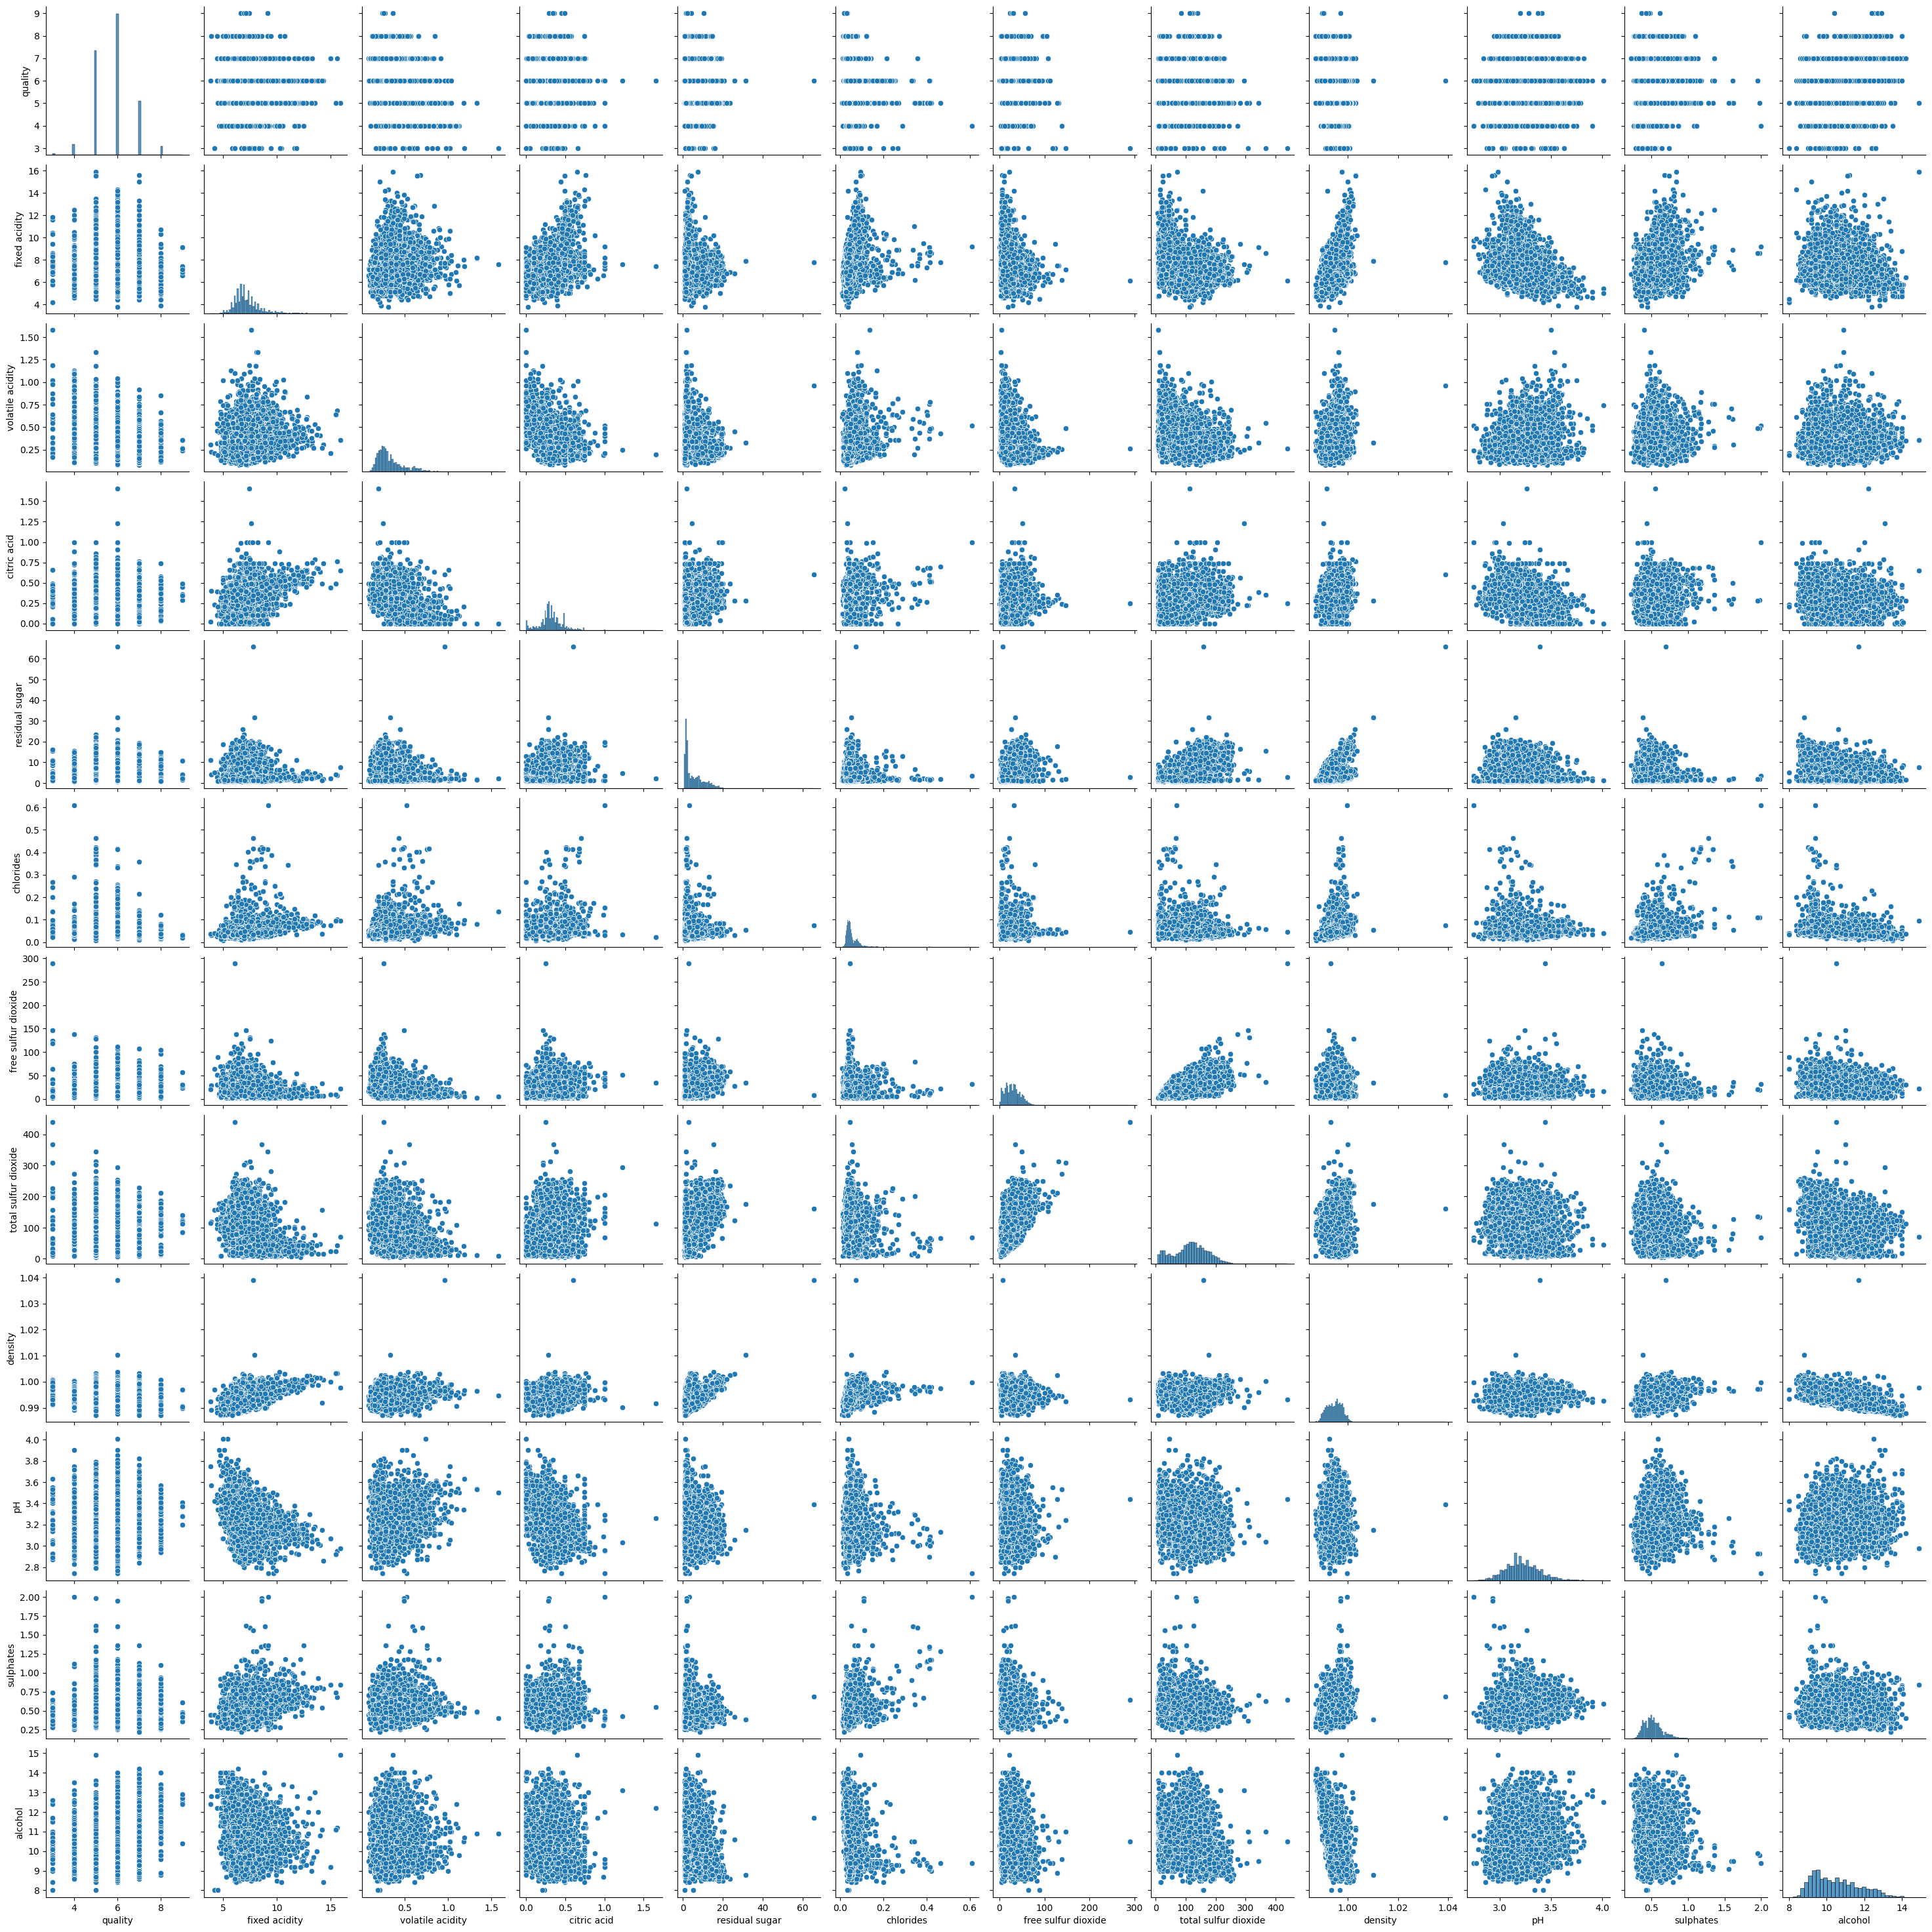

In [ ]:
sns.pairplot(train)

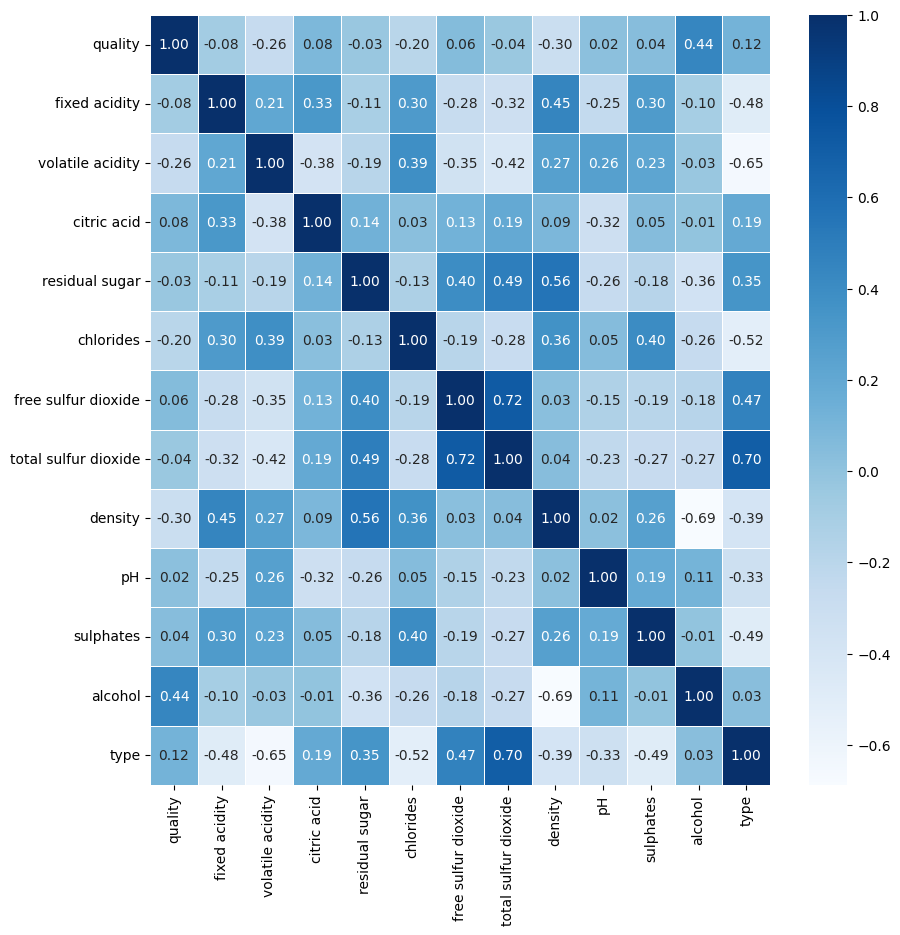

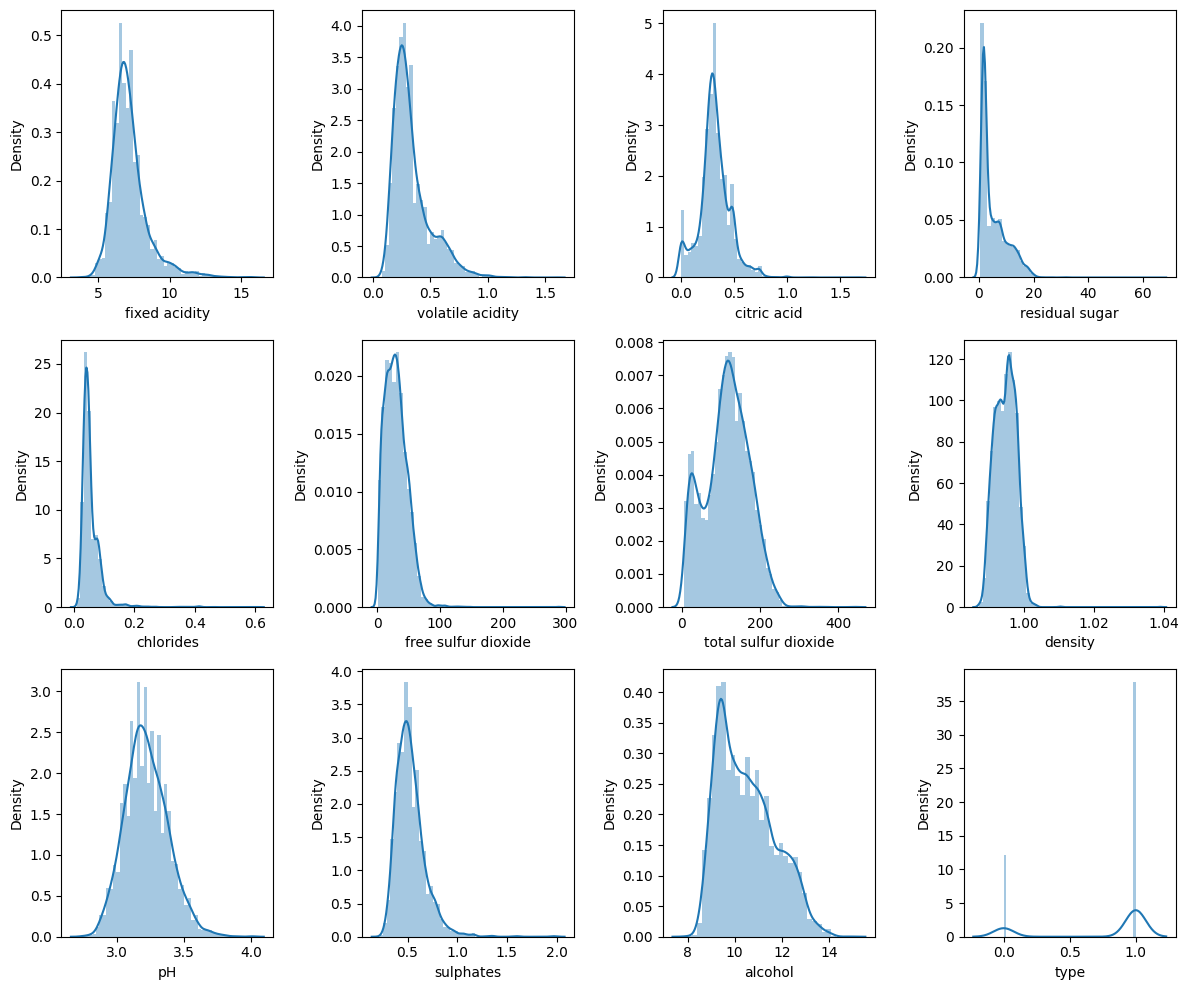

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data=train.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')

plt.figure(figsize=(12,10))
for i in range(1,13):
    plt.subplot(3,4,i)
    sns.distplot(train.iloc[:,i])
plt.tight_layout()
plt.show()

quality
6    2416
5    1788
7     924
4     186
8     152
3      26
9       5
Name: count, dtype: int64


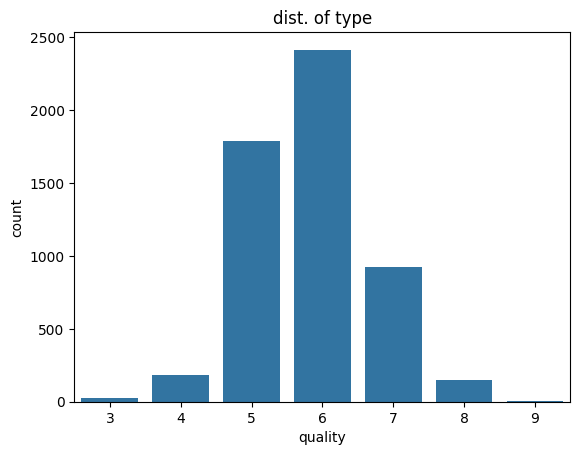

In [ ]:
print(train['quality'].value_counts())
sns.countplot(x=train['quality']);
plt.title("dist. of type", fontsize=12);

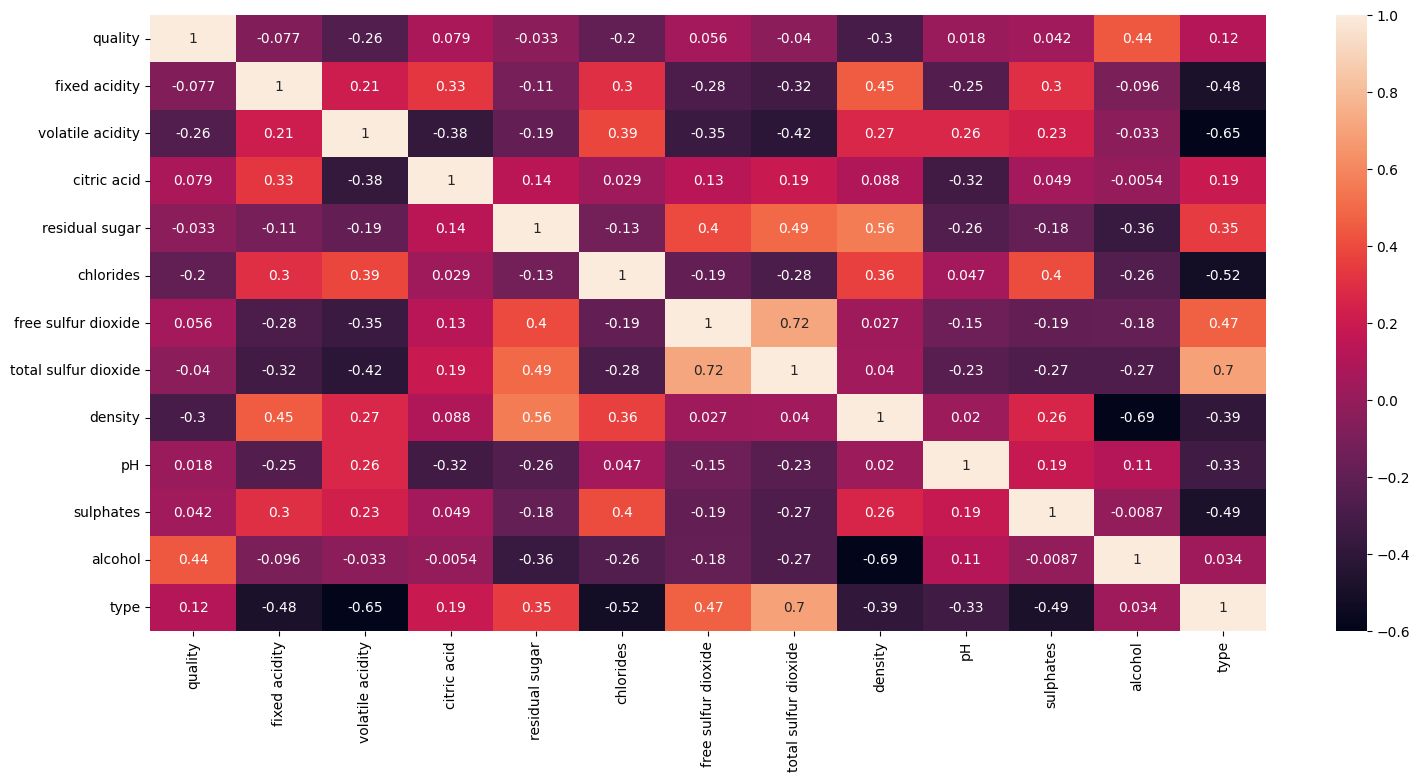

In [ ]:
plt.figure(figsize=(18,8))
corr= train.corr()
sns.heatmap(corr, annot=True, square=False, vmin=-.6, vmax=1.0);

<Axes: xlabel='fixed acidity', ylabel='quality'>

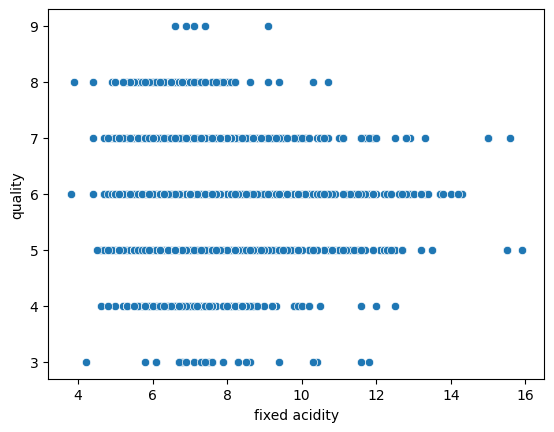

In [ ]:
sns.scatterplot(x='fixed acidity', y='quality', data=train)

- quality가 높은 와인일수록 fixed acidity가 6~8에 머무름

In [21]:
train[['quality', 'fixed acidity']]

,quality,fixed acidity
0,5,5.6
1,5,8.8
2,5,7.9
3,6,7.0
4,6,7.8
...,...,...
5492,5,7.7
5493,6,6.3
5494,7,7.8
5495,5,6.6


# **4. 데이터 분류**

### 코드 정리

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/wine/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/wine/test.csv")
sub = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/wine/sample_submission.csv")

In [6]:
# type 피처 원핫 인코딩
# white 1, red 0

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train['type'])
train['type'] = le.transform(train['type'])
test['type'] = le.transform(test['type'])
# X = pd.get_dummies(X, columns=['type'], prefix=['type'])

In [7]:
# index 피처 드랍
X = train.drop(['index', 'quality'], axis=1)
y = train.iloc[:, 1]
test_x = test.drop('index', axis=1)

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### 랜덤 포레스트 (0.694)

In [65]:
# 1
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X,y)
y_pred = rf_clf.predict(test_x)
sub['quality'] = y_pred



In [70]:
sub.to_csv('baseline.csv', index=False)

점수 : 0.694

In [8]:
# 2 - grid search cv

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [100],
    'max_depth' : [6, 8, 10, 12],
    'min_samples_leaf' : [8, 12, 18],
    'min_samples_split' : [8, 16, 20]
    }

rf_clf = RandomForestClassifier(n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X, y)

print('최적 하이퍼 파라미터: \n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터: 
 {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 16, 'n_estimators': 100}
최고 예측 정확도: 0.5889


In [9]:
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=12, min_samples_leaf=8, \
                                 min_samples_split=16)
rf_clf1.fit(X, y)
y_pred = rf_clf1.predict(test_x)
sub['quality'] = y_pred
sub.to_csv('rf2.csv', index=False)

점수 : 0.623

In [12]:
rf_clf1 = RandomForestClassifier(n_estimators=100, max_depth=12, min_samples_leaf=8, \
                                 min_samples_split=16)
rf_clf1.fit(X, y)
y_pred = rf_clf1.predict(test_x)
sub['quality'] = y_pred
sub.to_csv('rf2_1.csv', index=False)

점수 : 0.615

In [10]:
# 3
params = {
    'n_estimators' : [100, 200, 300],
    'max_depth' : [6, 8, 10, 12],
    'min_samples_leaf' : [8, 12, 18],
    'min_samples_split' : [8, 16, 20]
    }

rf_clf = RandomForestClassifier(n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X, y)

print('최적 하이퍼 파라미터: \n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터: 
 {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 300}
최고 예측 정확도: 0.5869


In [11]:
rf_clf2 = RandomForestClassifier(n_estimators=300, max_depth=12, min_samples_leaf=8, \
                                 min_samples_split=8)
rf_clf2.fit(X, y)
y_pred = rf_clf2.predict(test_x)
sub['quality'] = y_pred
sub.to_csv('rf3.csv', index=False)

점수 : 0.619

### GBM (0.603)

In [80]:
from sklearn.ensemble import GradientBoostingClassifier

GBM_clf = GradientBoostingClassifier()
GBM_clf.fit(X, y)
y_pred_gbm = GBM_clf.predict(test_x)
sub['quality'] = y_pred_gbm

In [72]:
sub.to_csv('baseline2.csv', index=False)

In [73]:
sub.head()

,index,quality
0,0,6
1,1,5
2,2,5
3,3,6
4,4,6


점수 : 0.603

### XGBoost (0.698)

In [82]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/wine/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/wine/test.csv")
sub = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/wine/sample_submission.csv")

In [83]:
from sklearn.preprocessing import LabelEncoder

train1 = pd.get_dummies(train, columns=['type'], prefix=['type'])
test1 = pd.get_dummies(test, columns=['type'], prefix=['type'])

In [84]:
# train1, test1의 boolean값들 0,1로 변환
train1.iloc[:, -2:] = train1.iloc[:, -2:].astype(int)
test1.iloc[:, -2:] = test1.iloc[:, -2:].astype(int)

In [85]:
X = train1.drop(['index', 'quality'], axis=1)
y = train1['quality']
test1 = test1.drop('index', axis=1)

le = LabelEncoder()
y = le.fit_transform(y)

In [22]:
# 1
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X, y)
y_pred_xgb = xgb_clf.predict(test1)
sub['quality'] = y_pred_xgb +3

In [23]:
sub.head()

,index,quality
0,0,5
1,1,5
2,2,5
3,3,5
4,4,6


In [25]:
sub.to_csv('xgb.csv', index=False)

점수 : 0.684

In [26]:
# 2
from sklearn.model_selection import GridSearchCV

xgb2 = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=7)
params = {'max_depth':[3, 5, 7],'min_child_weight':[1, 3],'colsample_bytree':[0.5, 0.75]}
gridcv = GridSearchCV(xgb2, param_grid=params, cv=3)
gridcv.fit(X, y)
print('GridSearchCV 최적 파라미터',gridcv.best_params_)

GridSearchCV 최적 파라미터 {'colsample_bytree': 0.5, 'max_depth': 7, 'min_child_weight': 1}


In [27]:
xgb2 = XGBClassifier(n_estimators=400, max_depth=7, min_child_weight=1, colsample_bytree=0.5)
xgb2.fit(X,y)
pred_xgb = xgb2.predict(test1) + 3

In [28]:
sub['quality'] = pred_xgb
sub.to_csv('xgb2.csv', index=False)

점수 : 0.683

In [88]:
# 3
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier(n_estimators=100)

params = {'max_depth': [13, 14, 15] , 'min_child_weight': [1, 2, 3] ,'colsample_bytree': [0.5, 0.75]}

gridcv = GridSearchCV(xgb, param_grid=params, scoring='accuracy', cv=3, verbose=1)
gridcv.fit(X, y)

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
GridSearchCV 최적 파라미터: {'colsample_bytree': 0.5, 'max_depth': 15, 'min_child_weight': 1}


In [61]:
xgb3 = XGBClassifier(n_estimator=1000, max_depth=13, min_child_weight=1, colsample_bytree=0.75, learning_rate=0.04, reg_alpha=0.03)

xgb3.fit(X, y, eval_metric='logloss')
y_pred = xgb3.predict(test1)

In [62]:
sub['quality'] = y_pred +3
sub.to_csv('xgb3.csv', index=False)

점수 : 0.698

In [70]:
# 4
X = train1.drop(['index', 'quality', 'citric acid', 'chlorides'], axis=1)
test1.drop(['citric acid', 'chlorides'], axis=1, inplace=True)

In [75]:
xgb4 = XGBClassifier(n_estimator=1000, max_depth=13, min_child_weight=1, colsample_bytree=0.75, learning_rate=0.04, reg_alpha=0.03)

xgb4.fit(X, y, eval_metric='logloss')
y_pred = xgb4.predict(test1)

In [78]:
sub['quality'] = y_pred +3
sub.to_csv('xgb4.csv', index=False)

점수 : 0.69

In [81]:
# 5
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier(n_estimators=100)

params = {'max_depth': [13, 14, 15] , 'min_child_weight': [1, 2, 3] ,'colsample_bytree': [0.5, 0.75],
          'learning_rate':[0.01,0.04,0.06],'reg_alpha':[0.01,0.03,0.05]}

gridcv = GridSearchCV(xgb, param_grid=params, scoring='accuracy', cv=3, verbose=1)
gridcv.fit(X, y)

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)

Fitting 3 folds for each of 162 candidates, totalling 486 fits
GridSearchCV 최적 파라미터: {'colsample_bytree': 0.5, 'learning_rate': 0.04, 'max_depth': 13, 'min_child_weight': 1, 'reg_alpha': 0.01}


In [86]:
xgb5 = XGBClassifier(n_estimator=1000, max_depth=13, min_child_weight=1, colsample_bytree=0.5, learning_rate=0.04, reg_alpha=0.01)

xgb5.fit(X, y, eval_metric='logloss')
y_pred = xgb5.predict(test1)

In [87]:
sub['quality'] = y_pred +3
sub.to_csv('xgb5.csv', index=False)

점수 : 0.699

### LightGBM (0.695)

In [ ]:
# 1
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier()
lgbm_clf.fit(X,y)
y_pred_lgbm = lgbm_clf.predict(test_x)
sub['quality'] = y_pred_lgbm

In [75]:
sub.head()

,index,quality
0,0,5
1,1,5
2,2,6
3,3,5
4,4,6


In [76]:
sub.to_csv('baseline3.csv', index=False)

점수 : 0.679

In [2]:
from lightgbm import LGBMClassifier

In [ ]:
# 2
lgbm_clf2 = LGBMClassifier(n_estimators=400)
lgbm_clf2.fit(X, y, eval_metric="logloss")
y_pred_lgbm = lgbm_clf2.predict(test_x)
sub['quality'] = y_pred_lgbm

In [23]:
sub.to_csv('lgbm2.csv', index=False)

점수 ; 0.69

In [29]:
!pip install lightgbm==3.3.2
import lightgbm
import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.4 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.1.0
    Uninstalling lightgbm-4.1.0:
      Successfully uninstalled lightgbm-4.1.0


In [8]:
from sklearn.model_selection import GridSearchCV

In [11]:
# 3

lgbm_clf3 = LGBMClassifier(n_estimators=200)

params = {'num_leaves':[32,64],
          'max_depth':[128,160],
          'min_child_samples':[60,100],
          'subsample':[0.8,1]}

# cv는 3으로 지정
gridcv = GridSearchCV(lgbm_clf3, param_grid=params, cv=3)
gridcv.fit(X, y)

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)



GridSearchCV 최적 파라미터: {'max_depth': 128, 'min_child_samples': 60, 'num_leaves': 64, 'subsample': 0.8}


In [13]:
lgbm_clf3 = LGBMClassifier(n_estimators = 1000, num_leaves=64, subsample=0.8, min_child_samples=60,
                          max_depth=128)
lgbm_clf3.fit(X, y, eval_metric="logloss")
y_pred_lgbm = lgbm_clf3.predict(test_x)

In [14]:
sub['quality'] = y_pred_lgbm

sub.to_csv('lgbm3.csv', index=False)

점수 : 0.695

In [19]:
# 4

lgbm_clf3 = LGBMClassifier(n_estimators=500)

params = {'num_leaves':[32,64],
          'max_depth':[128,160],
          'min_child_samples':[60,100],
          'subsample':[0.8,1]}

# cv는 3으로 지정
gridcv = GridSearchCV(lgbm_clf3, param_grid=params, cv=3)
gridcv.fit(X, y)

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)



GridSearchCV 최적 파라미터: {'max_depth': 128, 'min_child_samples': 60, 'num_leaves': 64, 'subsample': 0.8}


In [20]:
lgbm_clf3 = LGBMClassifier(n_estimators = 2000, num_leaves=64, subsample=0.8, min_child_samples=60,
                          max_depth=128)
lgbm_clf3.fit(X, y, eval_metric="logloss")
y_pred_lgbm = lgbm_clf3.predict(test_x)

In [21]:
sub['quality'] = y_pred_lgbm

sub.to_csv('lgbm4.csv', index=False)

점수 : 0.689

In [ ]:
# 5
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lgbm_clf5 = LGBMClassifier(n_estimators=200)

params = {'num_leaves':[32,64],
          'max_depth':[128,160],
          'min_child_samples':[60,100],
          'subsample':[0.8,1]}

# cv는 3으로 지정
gridcv = GridSearchCV(lgbm_clf5, param_grid=params, cv=3)
gridcv.fit(X_train, y_train)

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)


## Voting (0.695)


In [29]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/wine/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/wine/test.csv")
sub = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/wine/sample_submission.csv")

train.drop('index',axis = 1 ,inplace =True)
test.drop('index',axis = 1 ,inplace =True)

train1 = pd.get_dummies(train, columns=['type'], prefix=['type'])
test1 = pd.get_dummies(test, columns=['type'], prefix=['type'])

X = train1.drop('quality', axis=1)
y = train1['quality']

In [38]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# 1
lgbm = LGBMClassifier()
xgb = XGBClassifier()
rf = RandomForestClassifier()

voting = VotingClassifier(estimators=[('rf',rf),('xgb',xgb),('lgbm',lgbm)],voting = 'soft')

In [ ]:
voting.fit(X,y)

In [40]:
pred_voting = voting.predict(test1)
sub['quality'] = pred_voting
sub.to_csv('vt.csv', index=False)

점수 : 0.695

In [42]:
# 2

lgbm2 = LGBMClassifier(n_estimators = 1000, num_leaves=64, subsample=0.8, min_child_samples=60,
                          max_depth=128)
xgb = XGBClassifier()
rf = RandomForestClassifier()

voting2 = VotingClassifier(estimators=[('rf',rf),('xgb',xgb),('lgbm',lgbm2)],voting = 'soft')

In [ ]:
voting2.fit(X,y)
pred_voting2 = voting2.predict(test1)

In [44]:
sub['quality'] = pred_voting2
sub.to_csv('vt2.csv', index=False)

In [ ]:
# 3

## Stacking

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/wine/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/wine/test.csv")
sub = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/wine/sample_submission.csv")

train.drop('index',axis = 1 ,inplace =True)
test.drop('index',axis = 1 ,inplace =True)

train1 = pd.get_dummies(train, columns=['type'], prefix=['type'])
test1 = pd.get_dummies(test, columns=['type'], prefix=['type'])

X = train1.drop('quality', axis=1)
y = train1['quality']